### Unsupervised Machine Learning Task

In this task we have to predict optimum number of clusters and represent it visually. To explore Unsupervised Learning for this task, we ignore the target variable to predict optimum number of clusters using independent variables/features(X).

### Name : Mrinal Anand

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import load_iris class from the datasets module
from sklearn.datasets import load_iris

# Run load_iris function and save the returned value in object called iris 
iris = load_iris()

# This object is a special container called Bunch foe storing Scikit-learn's special object types for storing datasets and their 
# attributres.
type(iris)

sklearn.utils.Bunch

#### iris object database contains 4 attributes: 'data', 'feature_names', 'target', 'target_names' 

In [3]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [4]:
# feature_names are the names of the four input features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# target represents what we are going to predict 0 rep setosa, 1 rep versicolor, 2 rep verginica 
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [6]:
print(type(iris.data))
print(type(iris.feature_names))

<class 'numpy.ndarray'>
<class 'list'>


In [7]:
# loading iris dataset to pandas
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Dividing our data into input feature 'X' and target variable 'y'
X = iris.data
print(X.shape)

y = iris.target
print(y.shape)

(150, 4)
(150,)


### Finding the optimum number of cluster for k-means classification

k-Means algorithm as a simple optimization problem, an iterative approach for minimizing the Within-Cluster Sum of Squared Errors(WCSSE), which is sometimes also called cluster inertia.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.56163015873016, 38.930963049671746, 34.19068792479662, 30.063874432733137, 27.84235606060606, 26.04820224804436]


Text(0,0.5,'WCSSE')

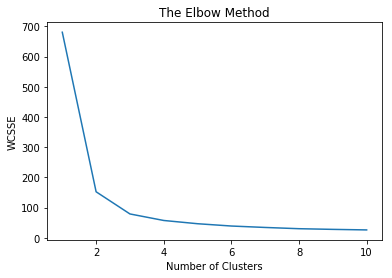

In [15]:
from sklearn.cluster import KMeans 
wcsse = [] # within cluster sum of square error

for i in range(1, 11):
    # Defining our model 
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init = 10,
                    max_iter = 300,
                    random_state = 0)
    # Train our model and argument X is our dataset that needs to be clustered 
    kmeans.fit(X) 
    # After using fit() our model is ready and we get inertia_ for that clusters using
    wcsse.append(kmeans.inertia_)

print(kmeans)
print(wcsse)

plt.plot(range(1, 11), wcsse) # x and y must have same first dimension; here both are of shape (10,) 
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSSE')

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. We can see that Within Cluster Sum of Squares Errors (WCSSE) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [19]:
# Applying kmeans to the dataset / Creating kmeans classifier
kmeans_classifier = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# fit_predict() - Computes cluster center and predict cluster index for each sample. It's just a convinience method and is 
# equivalent to calling fit(X) followed by predict(X).  
y_kmeans = kmeans_classifier.fit_predict(X)
y_kmeans # (150, ) returns Index of the cluster each sample belongs to

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

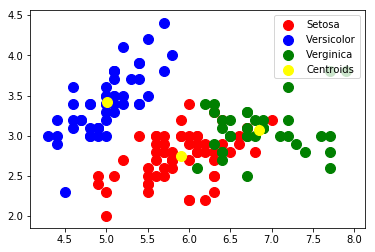

In [36]:
# Visualising the clusters - on the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Verginica')

# Plotting the centroid of the clusters
plt.scatter(kmeans_classifier.cluster_centers_[:, 0], kmeans_classifier.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend(loc = 'upper right') # To add a legend 